Print data shapes:
Data shape: (100, 300)
Labels shape: (100, 4)


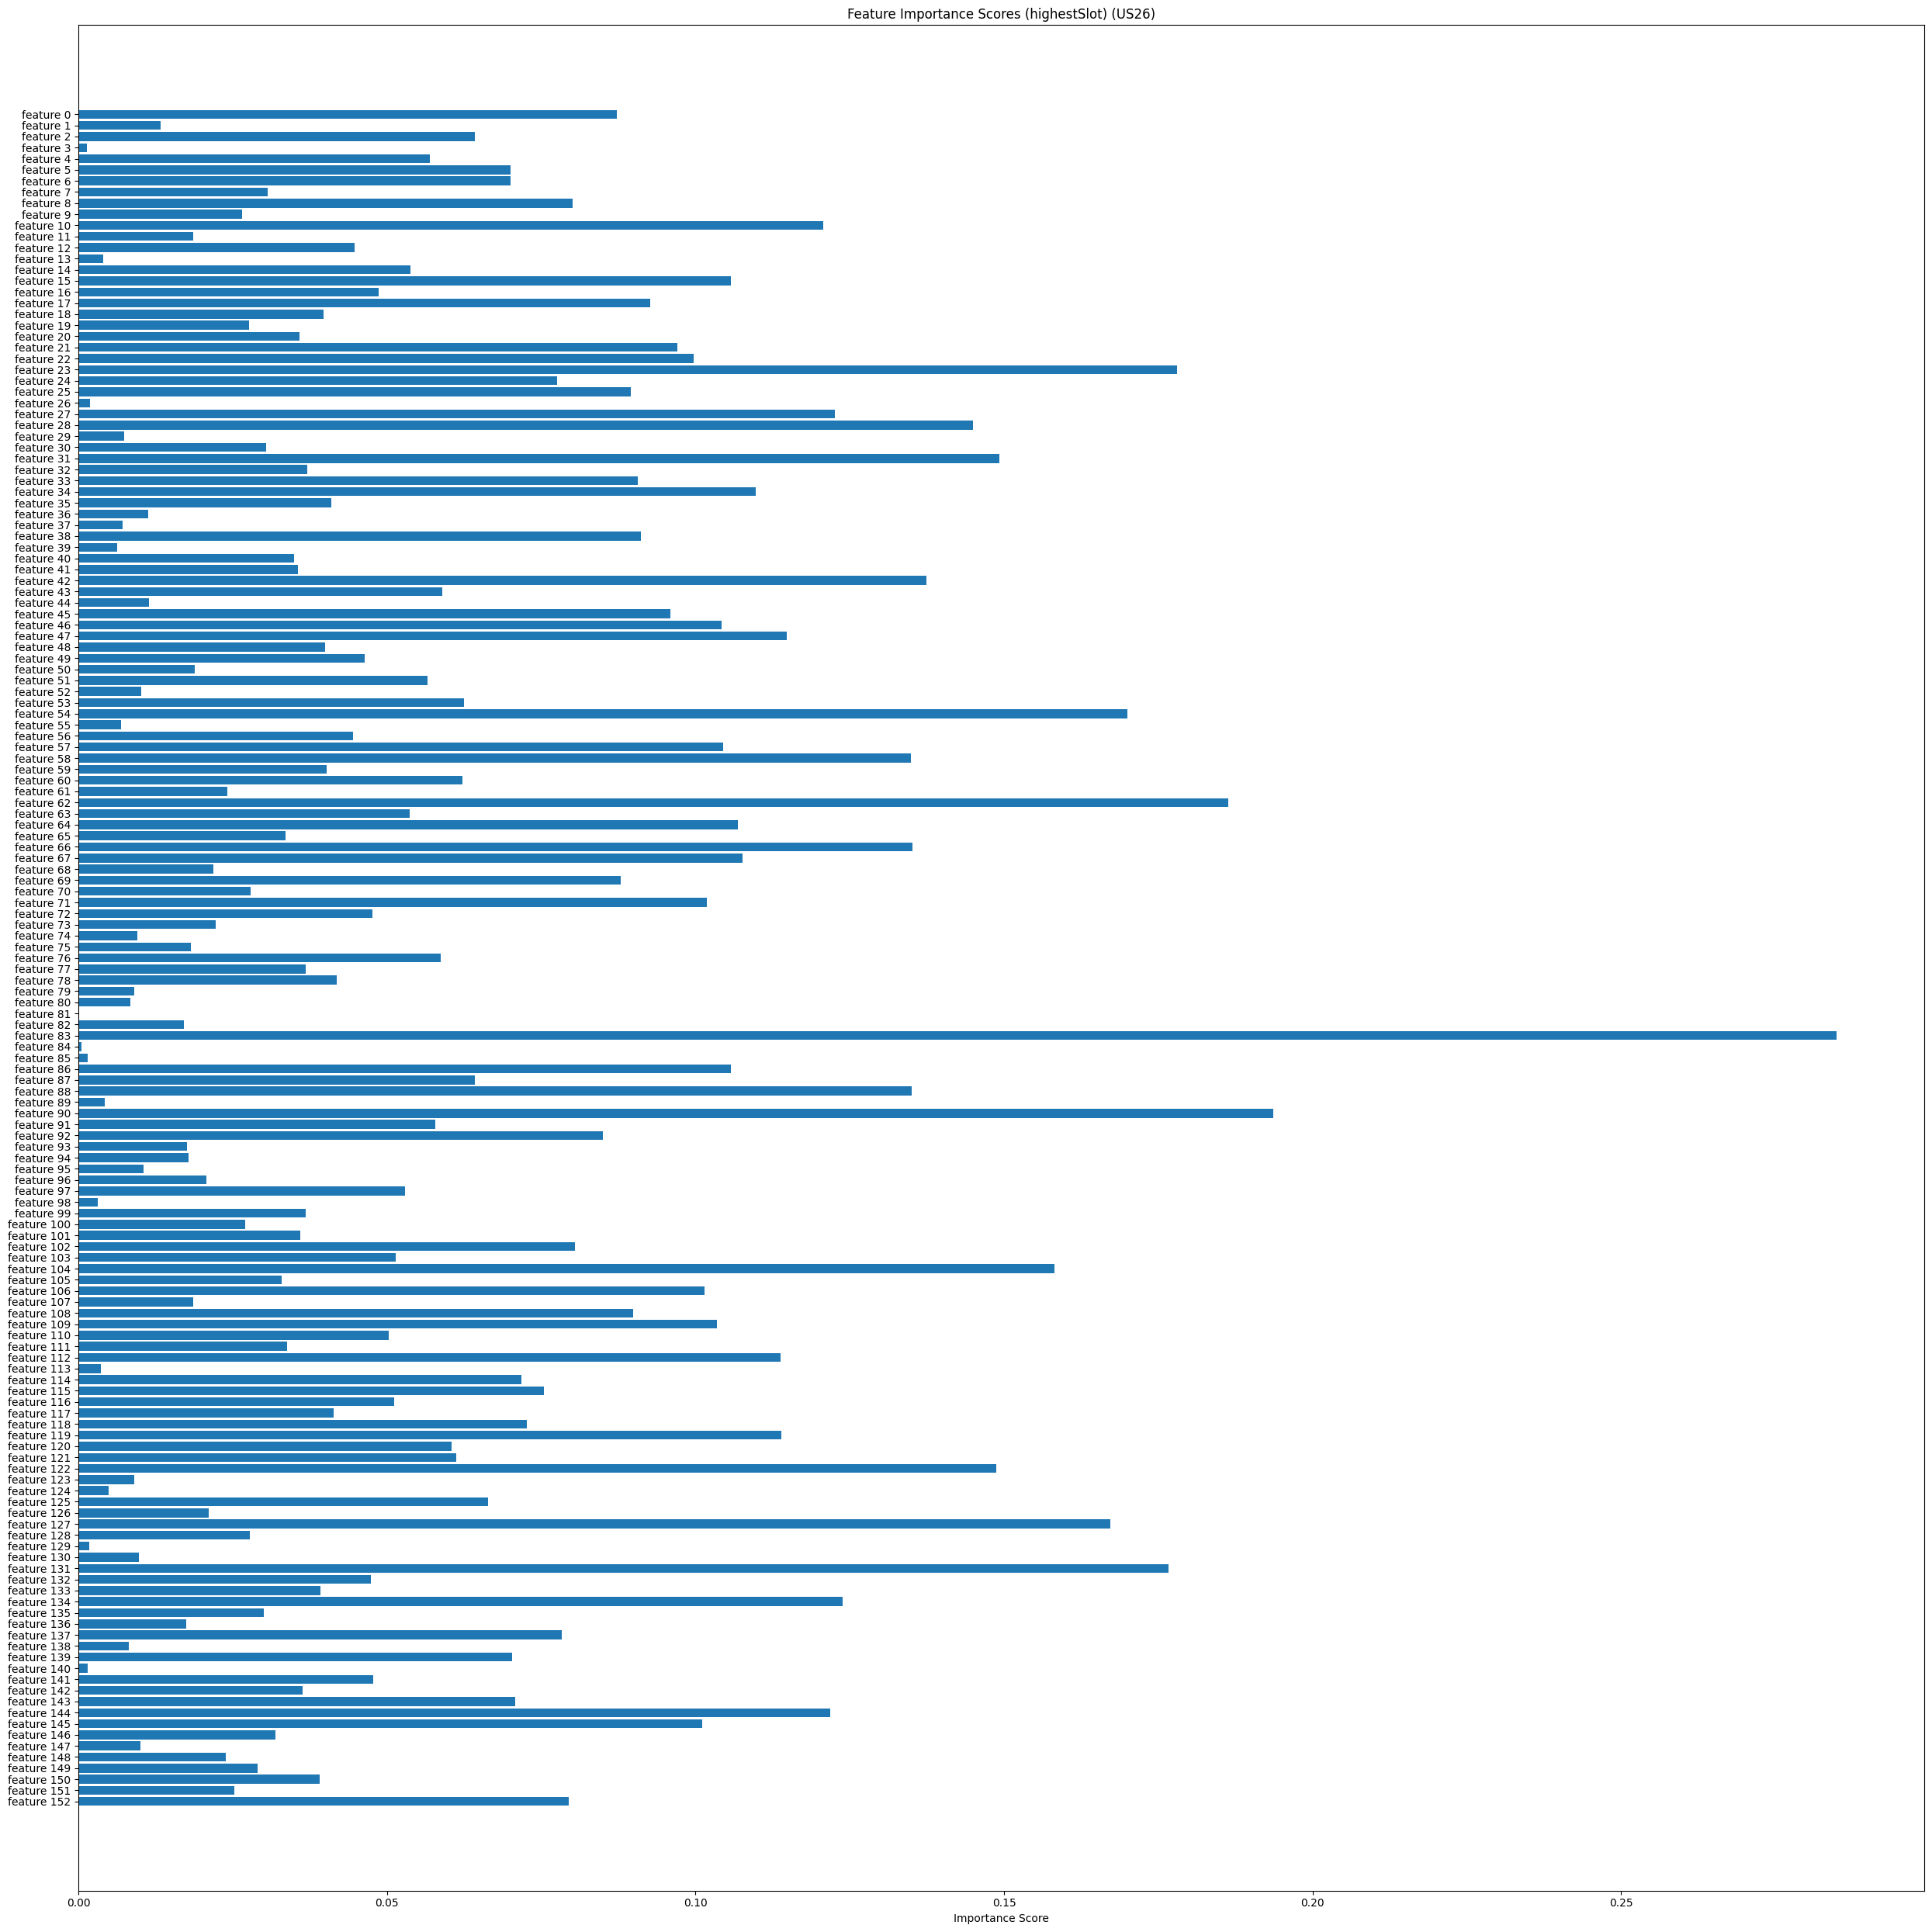

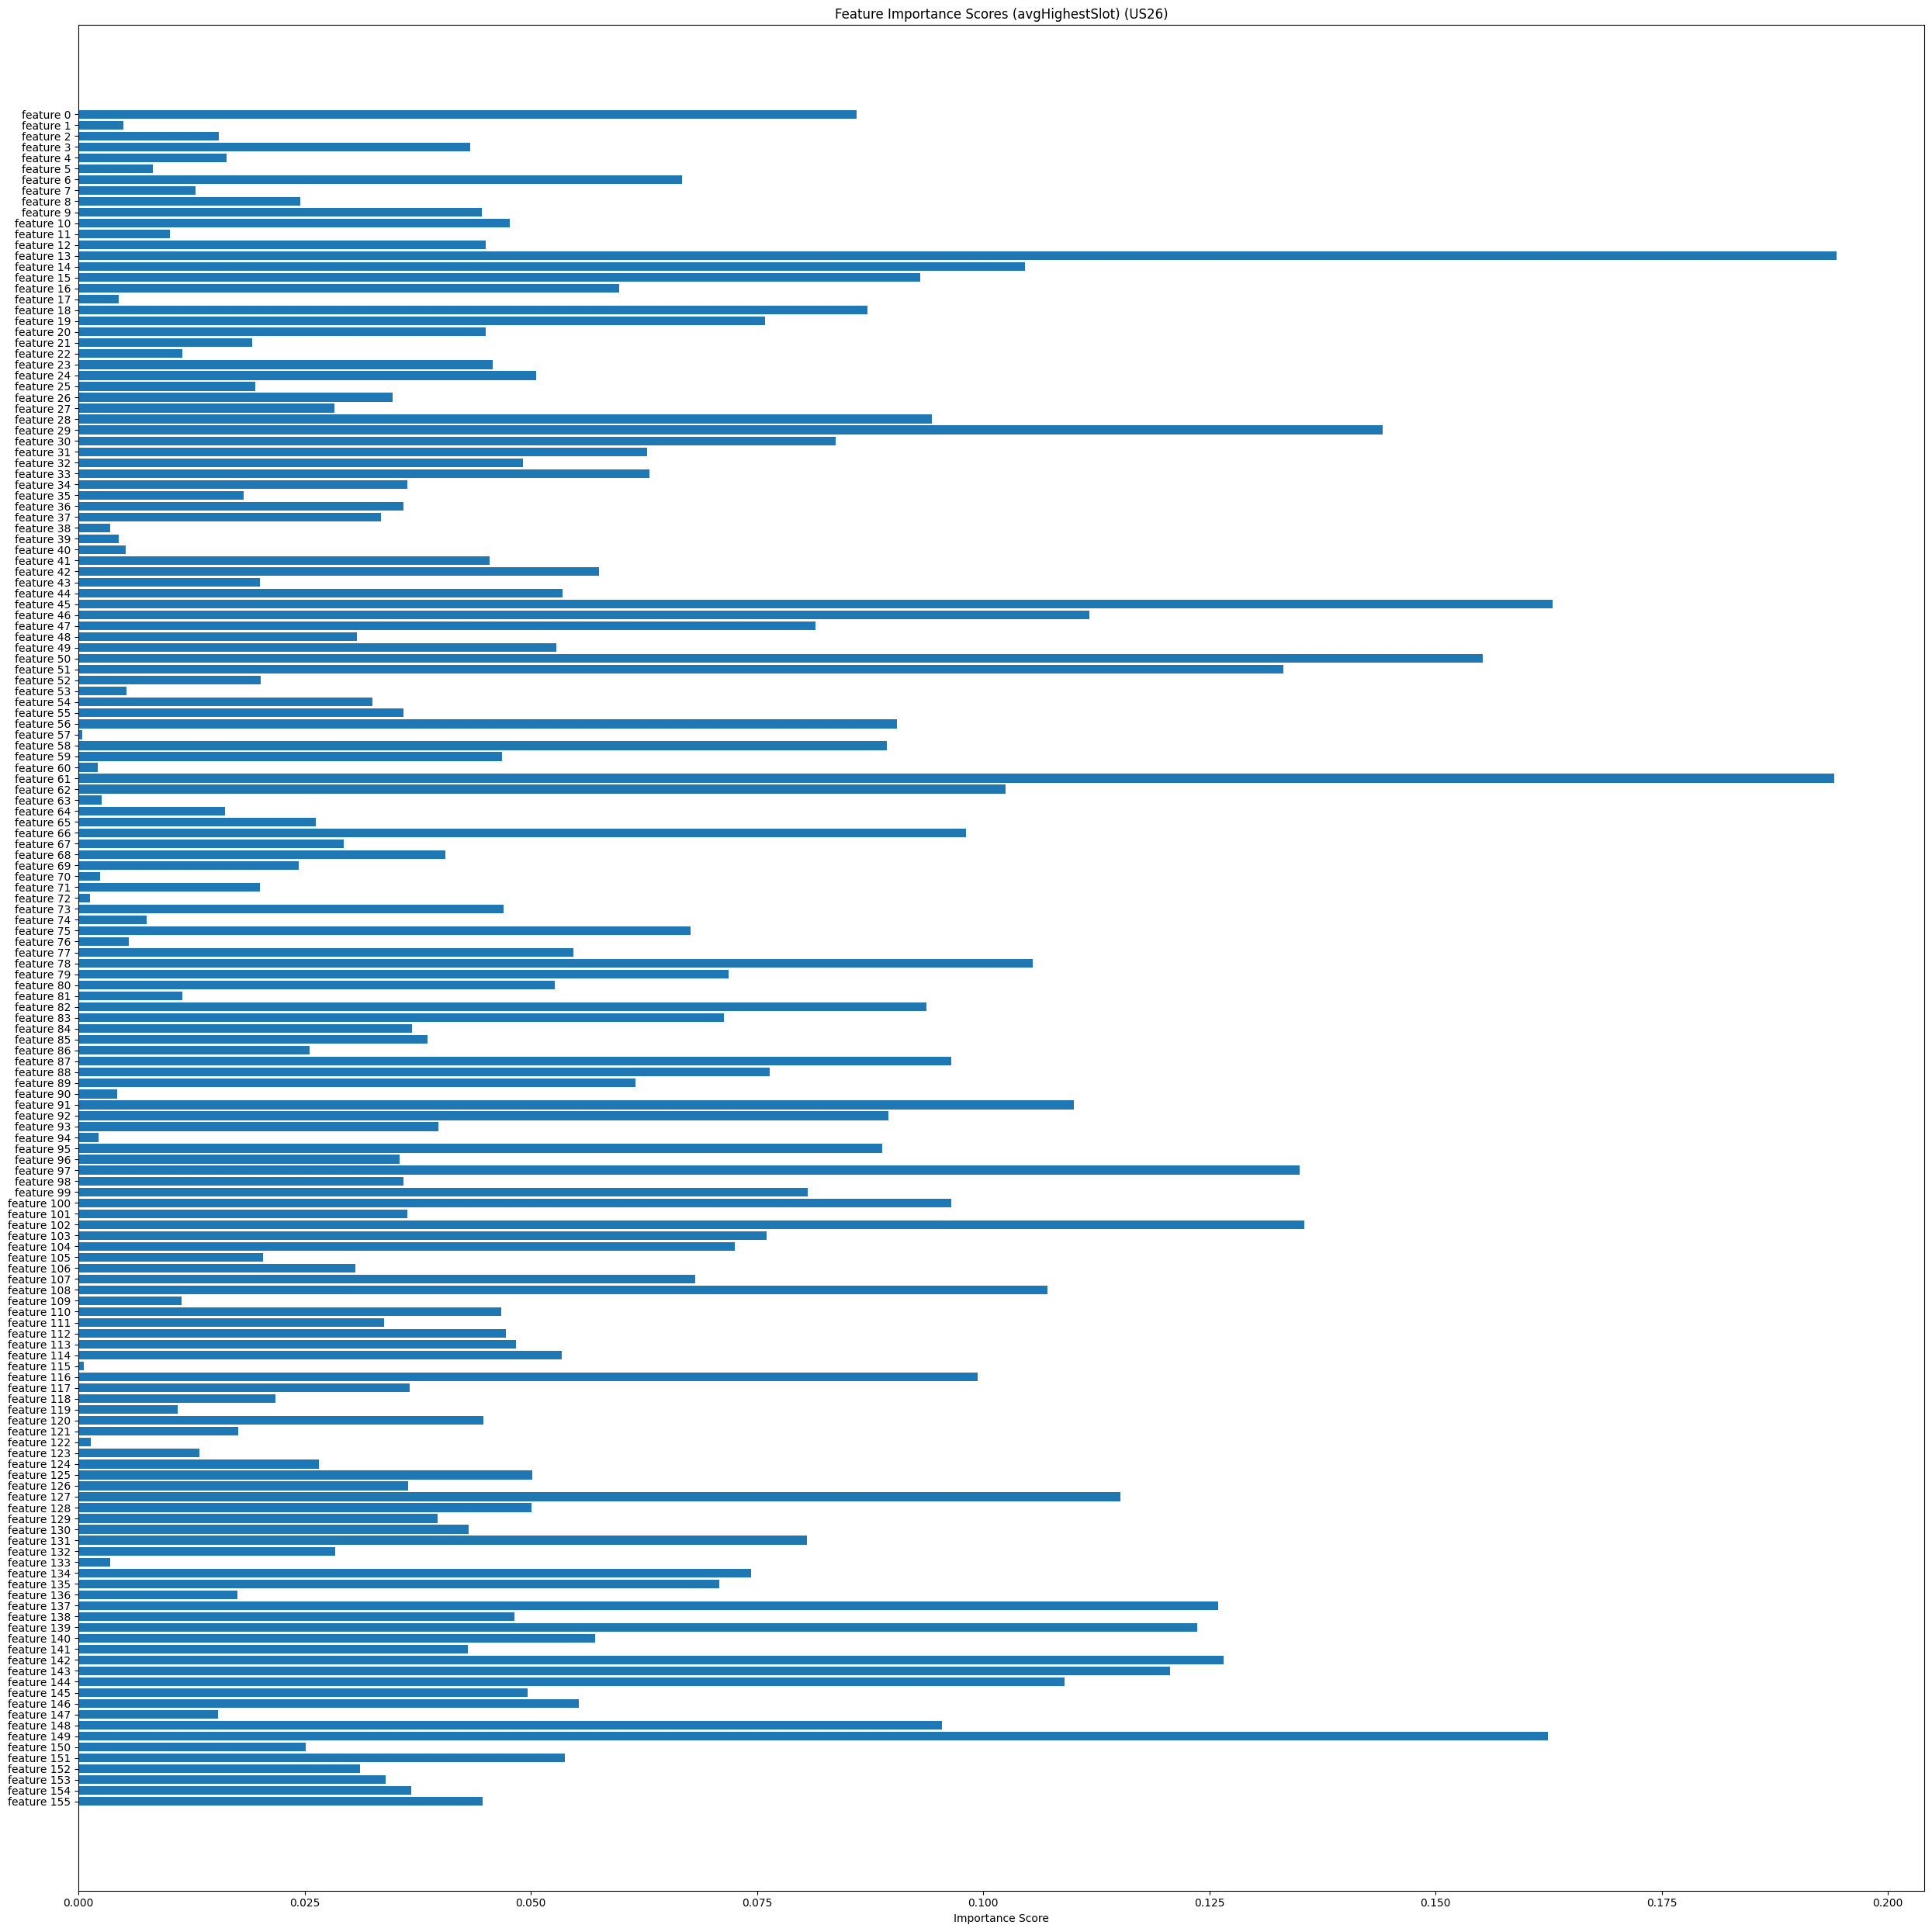

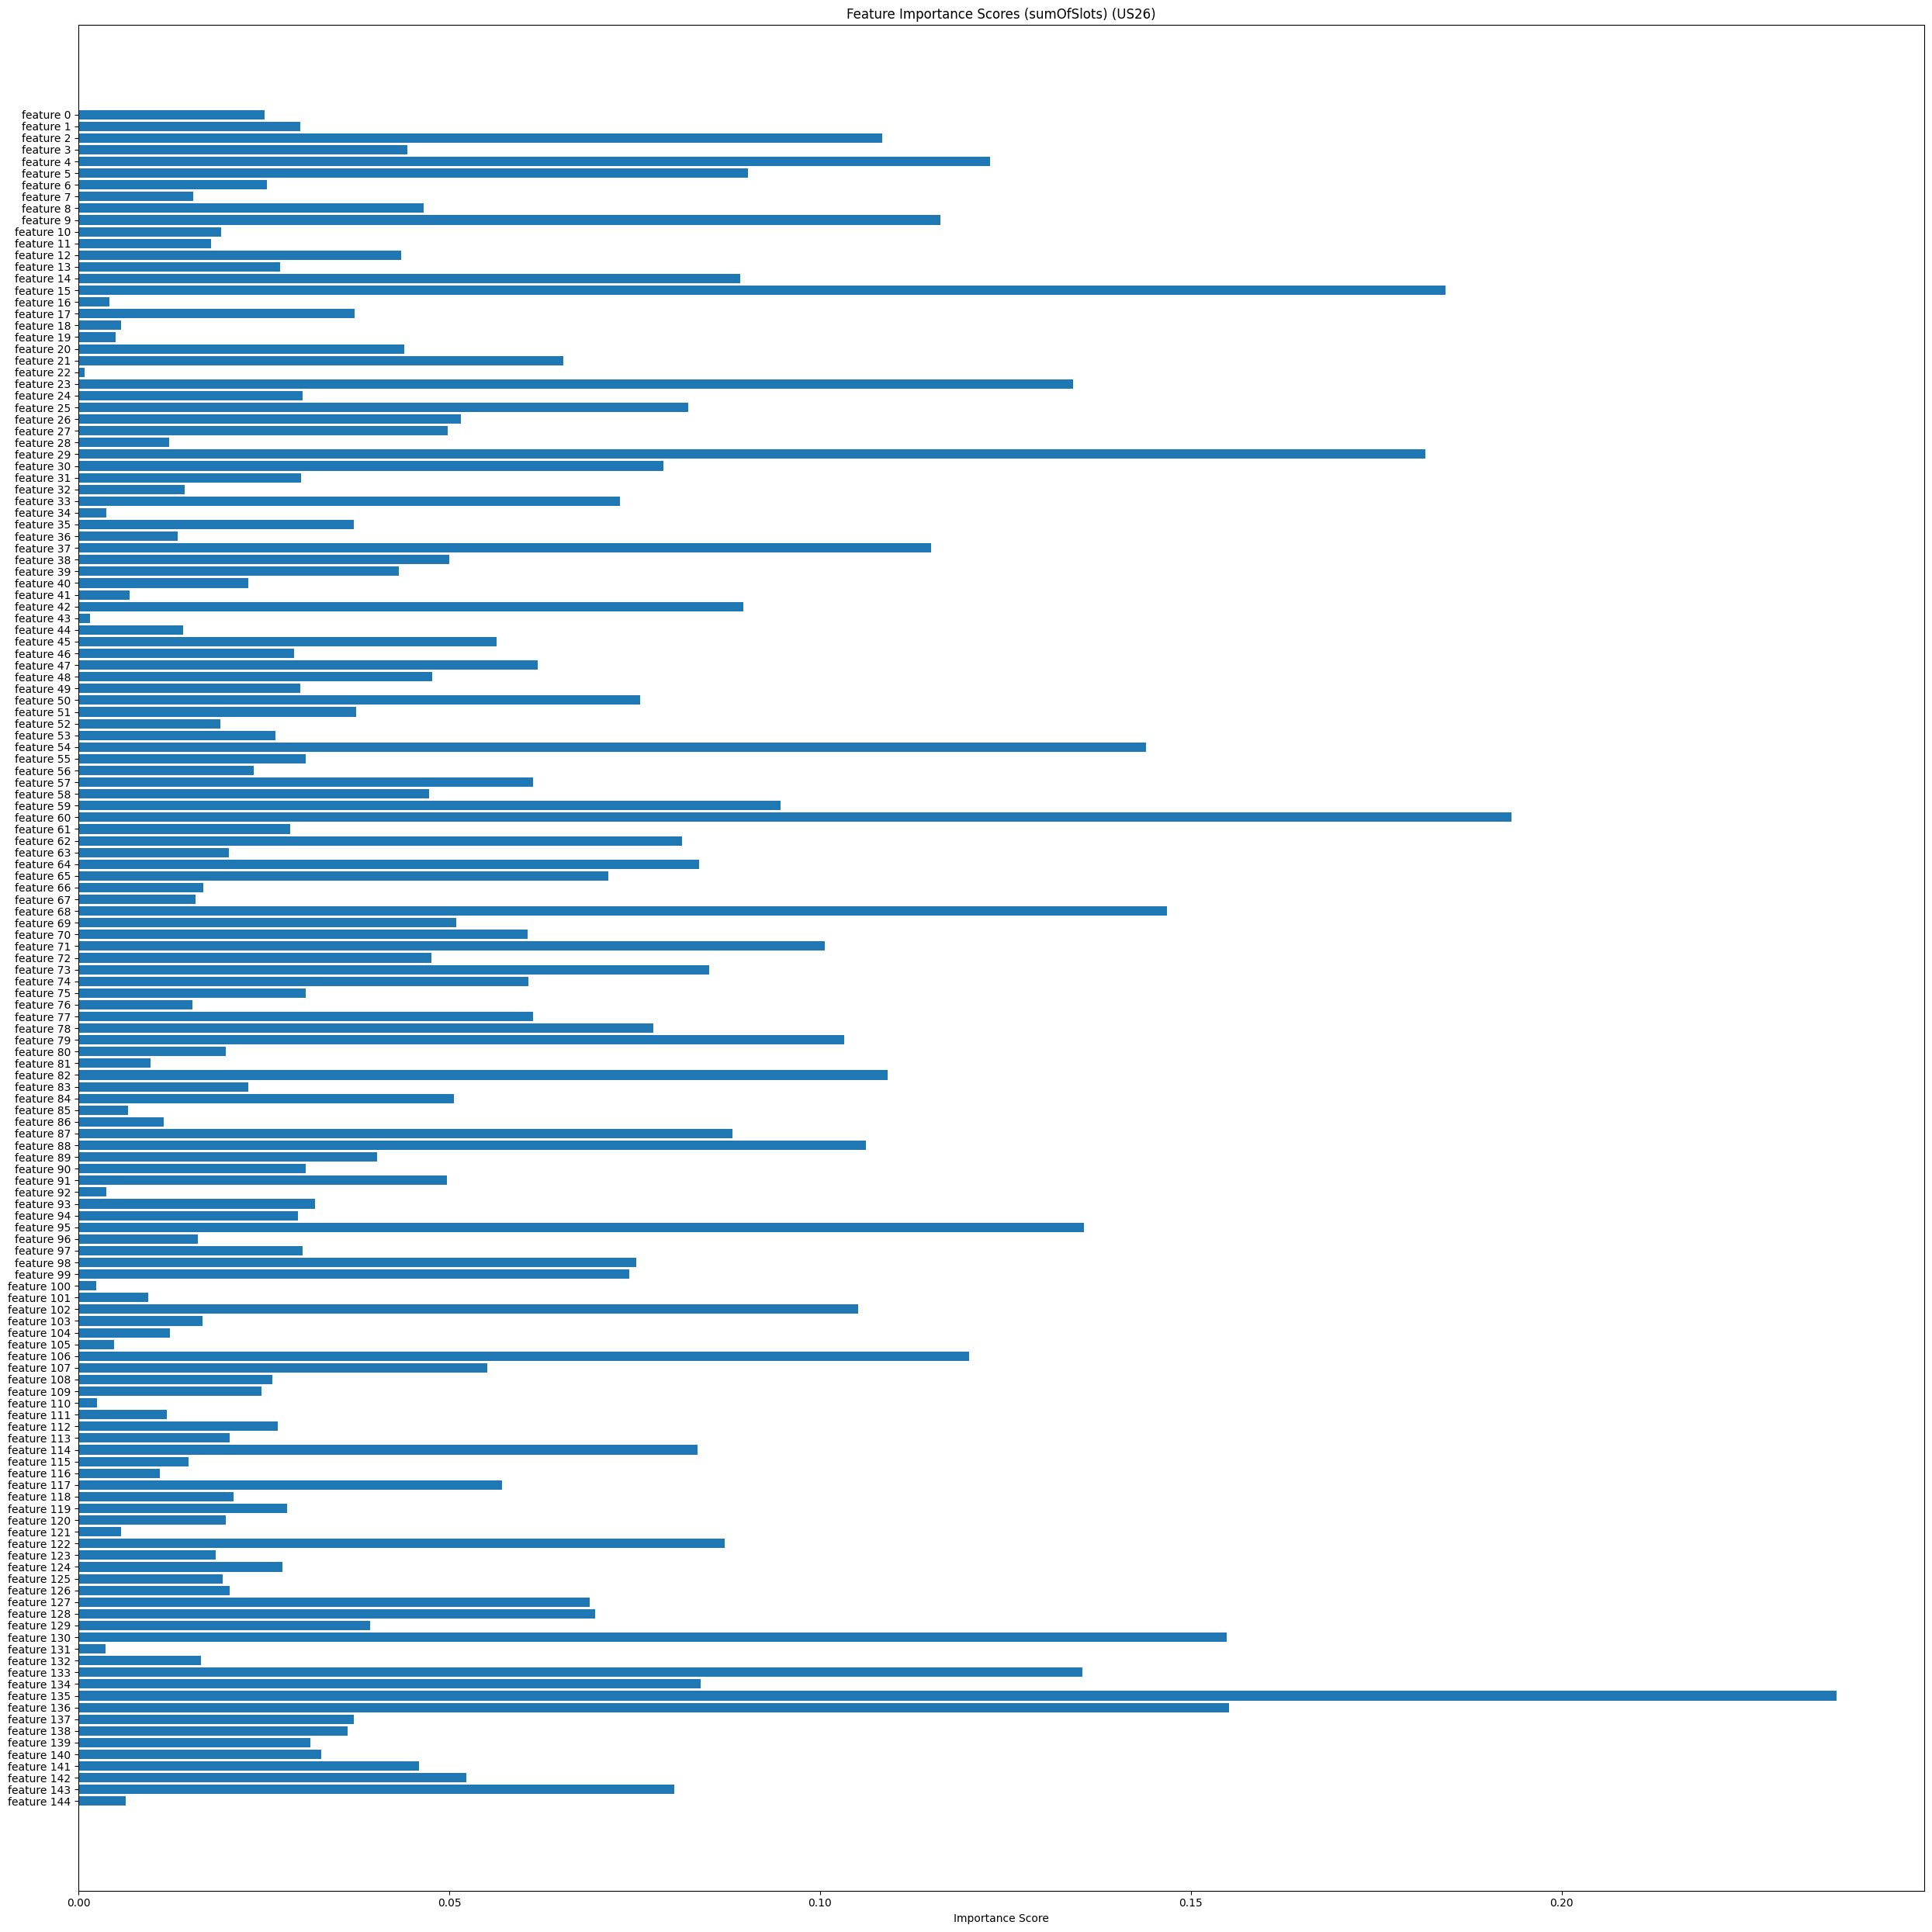

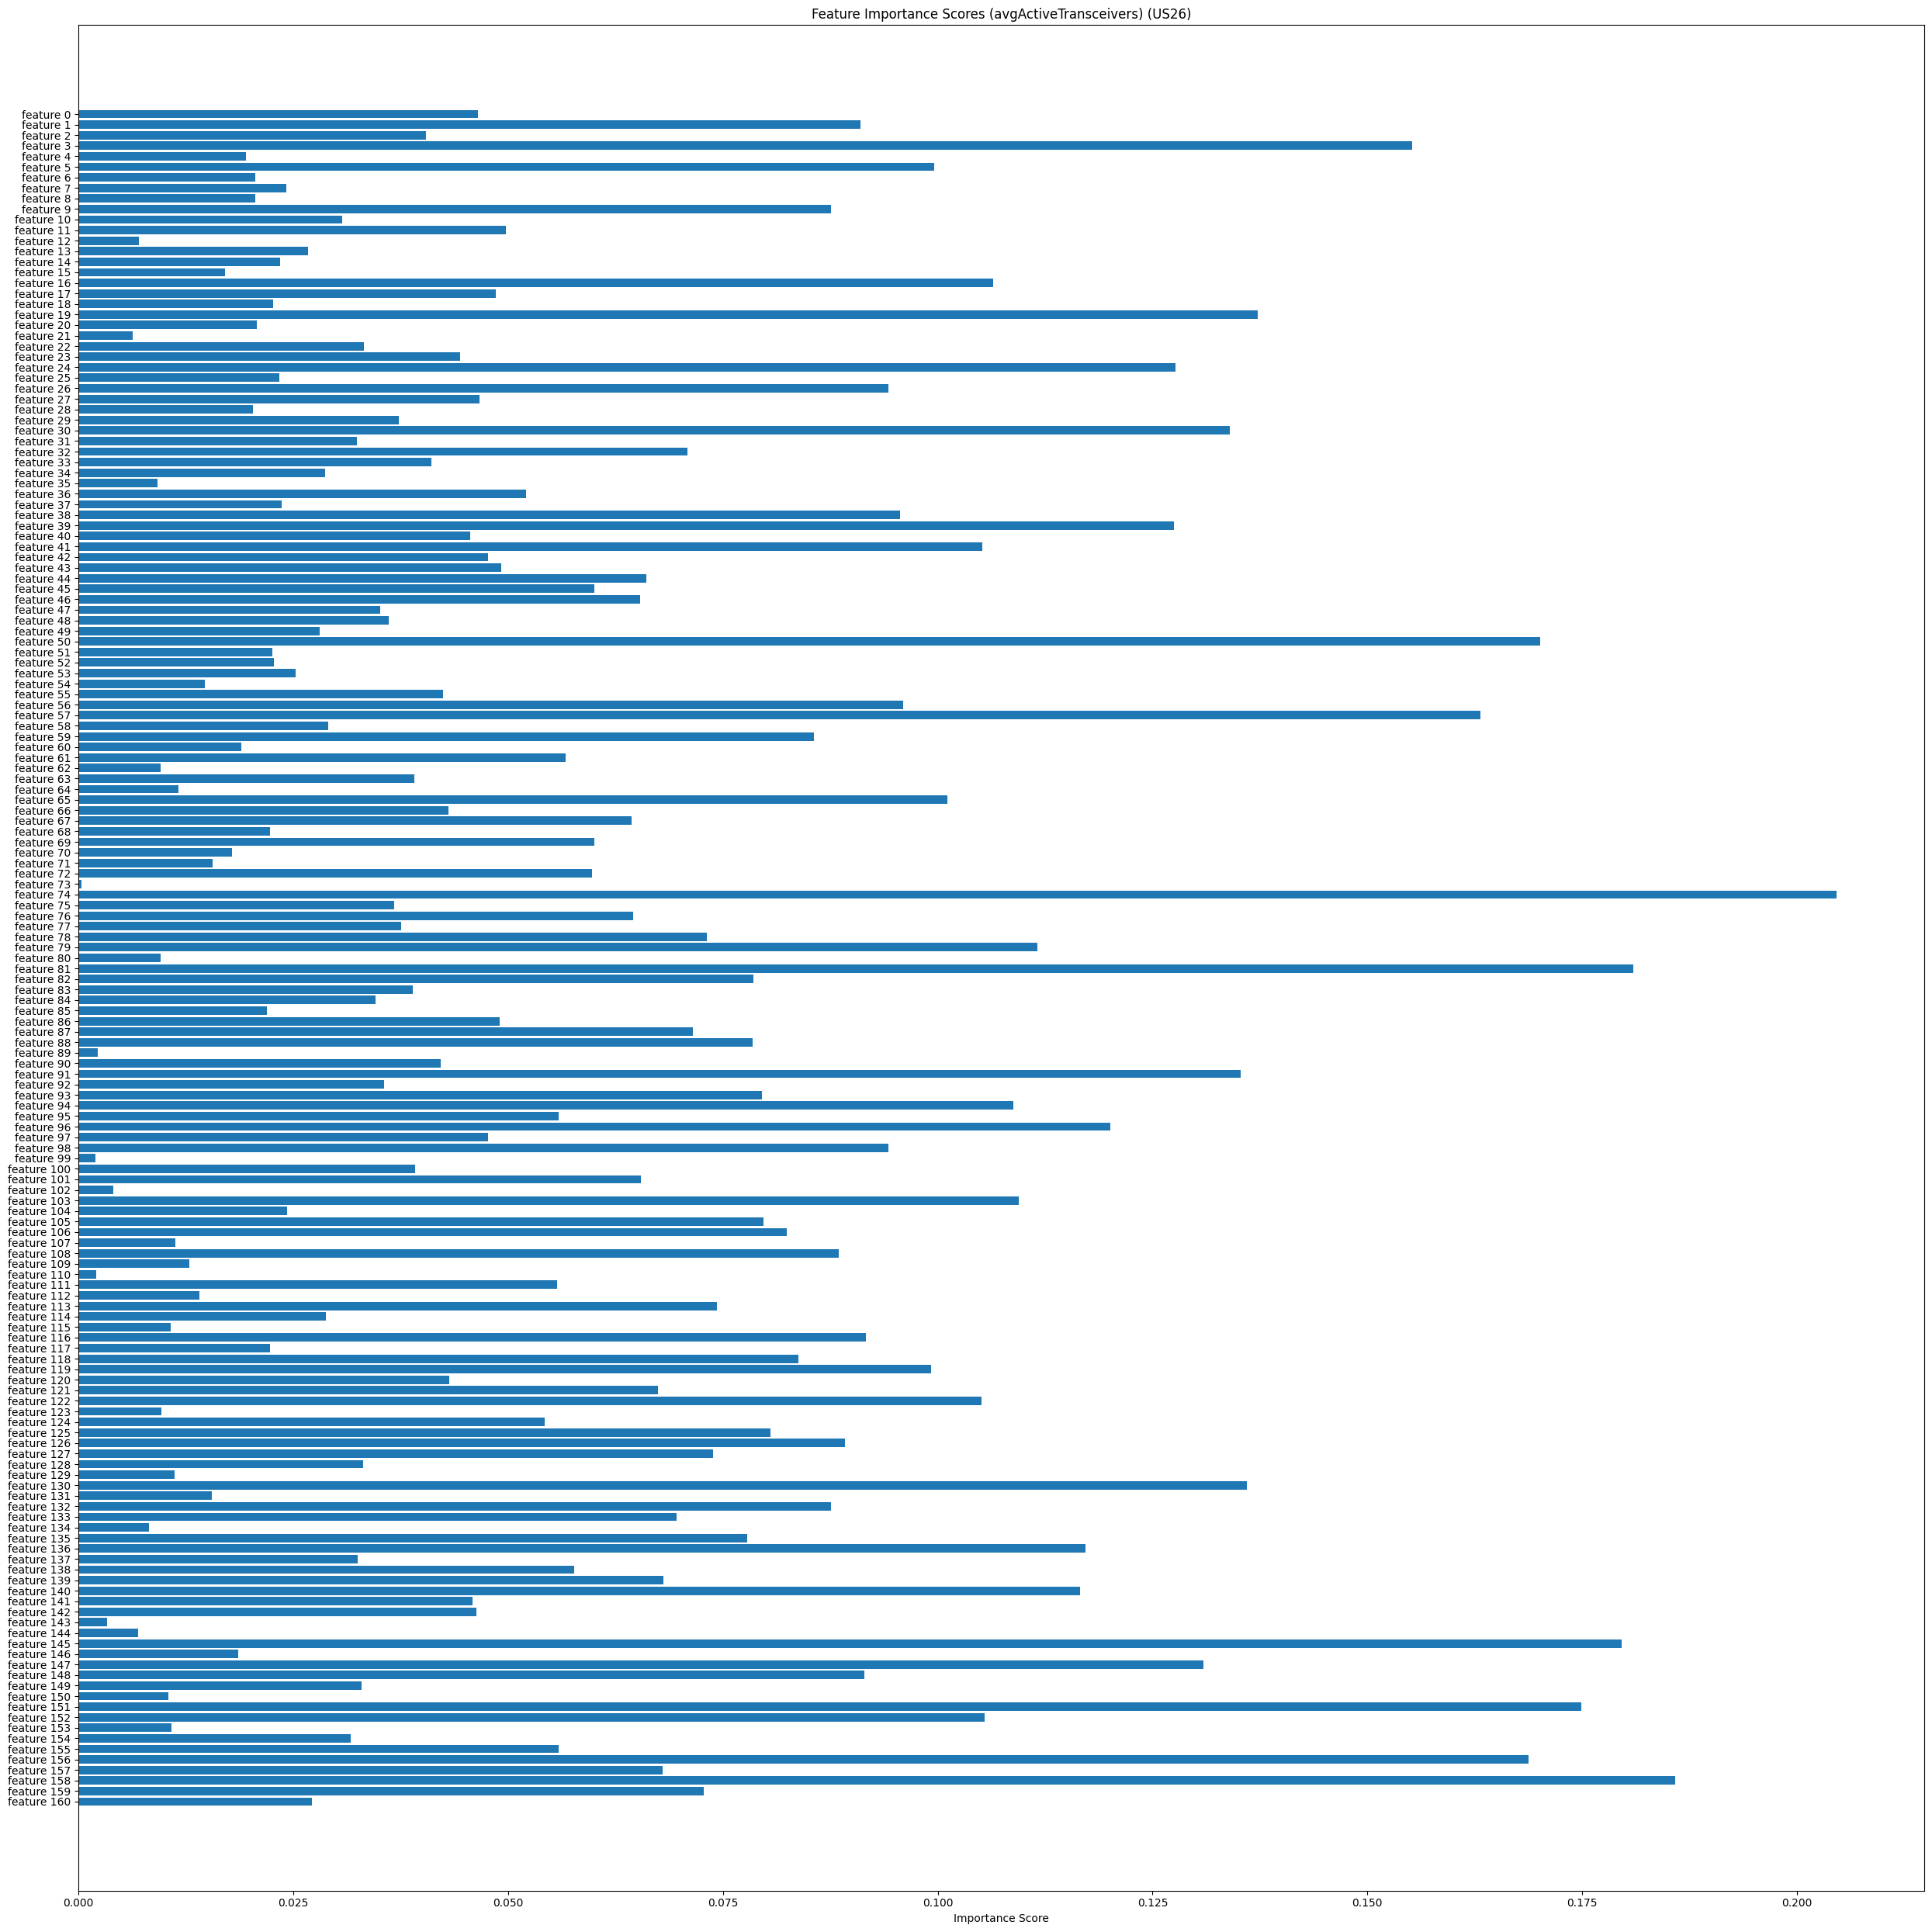

In [67]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_selection import mutual_info_regression
from import_data import import_data

dataset = "US26"
data, results = import_data(dataset)

data = data.reshape(100,300)
labels = results

print("Print data shapes:")
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

ticks = ["highestSlot", "avgHighestSlot", "sumOfSlots", "avgActiveTransceivers"]

for i in range(4):
    ig = mutual_info_regression(data, labels[:, i])
    ig_nonzero = [x for x in ig if x>0]

    fig, ax = plt.subplots(figsize=(25,25))
    y_pos = np.arange(len(ig_nonzero))
    ax.barh(y_pos, ig_nonzero, align="center")
    ax.set_yticks(y_pos)
    ax.set_yticklabels(f"feature {i}" for i in range(len(ig_nonzero)))
    ax.invert_yaxis()
    ax.set_xlabel("Importance Score")
    ax.set_title(f"Feature Importance Scores ({ticks[i]}) ({dataset})")
    plt.tight_layout()
    plt.savefig(f"img/feature_importance_of_100_requests_{ticks[i]}_{dataset}.png")

## Random Forest importance

Print data shapes:
Data shape: (100, 100, 3)
Labels shape: (100, 4)


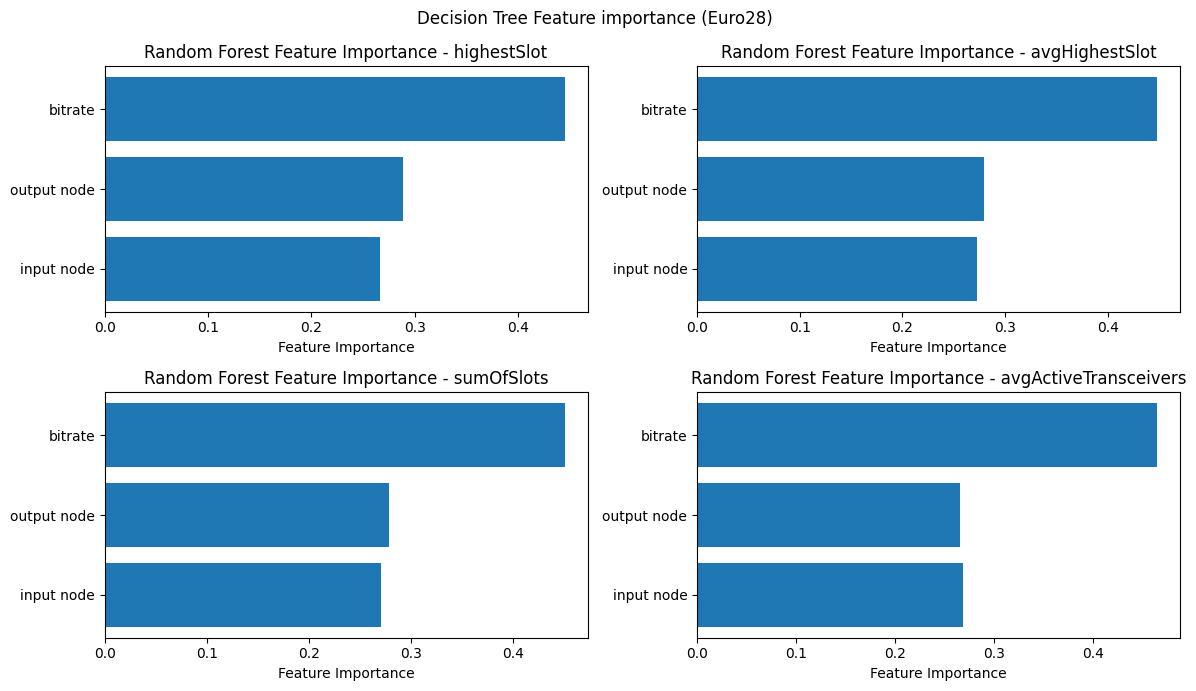

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from helpers.import_data import import_data

dataset = "Euro28"
data, results = import_data(dataset)
labels = results

print("Print data shapes:")
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

ticks = ["highestSlot", "avgHighestSlot", "sumOfSlots", "avgActiveTransceivers"]
fig, ax = plt.subplots(2, 2, figsize=(12,7))

axs = ax.flatten()

for i, ax in enumerate(axs):
    importances = []
    for j in range (100):
        tmp_data = data[:,j]
        rfc = DecisionTreeRegressor(random_state=42)
        rfc.fit(tmp_data, labels[:, i])
        importances.append(rfc.feature_importances_)

    importances = np.array(importances)
    importance = importances.mean(axis=0)
    ax.barh(range(len(importance)), importance, align="center")
    y_pos = np.arange(len(importance))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(["input node", "output node", "bitrate"])
    ax.set_title(f"Random Forest Feature Importance - {ticks[i]}")
    ax.set_xlabel("Feature Importance")

plt.suptitle(f"Decision Tree Feature importance ({dataset})")
plt.tight_layout()
plt.savefig(f"img/feature_importance_3_features_random_forest_{dataset}.png")